# **Install Libraries**

In [ ]:
#PyDrive is used to connect to Google Drive for importing Dataset, trained Models
!pip install PyDrive
#Gensim is a Memory efficient NLP Library, used for word2Vec Model creation
!pip install gensim
#Wordcloud is used for plotting wordClouds
!pip install wordcloud

# **Importing Modules**

In [ ]:
#Required Modules
#re-regex library, used for performing string substitution functions like removing usernames, links, emoticons.
import re
import string
import numpy as np
import pandas as pd
#csv library is used for reading .csv files 
import csv
from csv import reader
#pydrive library used to connect to Google Drive for importing Dataset, trained Models
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#nltk library is used for importing stopwords and Stemmer
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
#Gensim is a memory efficient library used for creating word2Vec Model and Corpus
import gensim
from gensim import corpora
import itertools
from collections import defaultdict
#matplot library is used for plotting Graphs
import matplotlib.pyplot as plt
from matplotlib import pyplot
#wordcloud library is used for creating WordClouds for EDA
from wordcloud import WordCloud
#sklearn is a ML library which is used here to perform PCA and Label Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#keras is a ML library used for building Deep Learning Models
import keras
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Activation, Dense, Dropout, Embedding,  LSTM
from tensorflow.keras import layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**Google** **Authorization**

In [ ]:
#Google Authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Access Google Drive
data = drive.CreateFile({'id':"1-BktOhkDeCD4S7B38R3Ri9JI7-AR1_Qh"})
data.GetContentFile("twitterReviews.csv")

# **Data Pre Processing**

In [ ]:
#Convert .csv to a dataframe
df = pd.read_csv('twitterReviews.csv', engine='python', names=["Score","Id", "Time", "Query", "Username","Tweet"])
print(df)

         Score  ...                                              Tweet
0            0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1            0  ...  is upset that he can't update his Facebook by ...
2            0  ...  @Kenichan I dived many times for the ball. Man...
3            0  ...    my whole body feels itchy and like its on fire 
4            0  ...  @nationwideclass no, it's not behaving at all....
...        ...  ...                                                ...
1599995      4  ...  Just woke up. Having no school is the best fee...
1599996      4  ...  TheWDB.com - Very cool to hear old Walt interv...
1599997      4  ...  Are you ready for your MoJo Makeover? Ask me f...
1599998      4  ...  Happy 38th Birthday to my boo of alll time!!! ...
1599999      4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 6 columns]


In [ ]:
df.head()

,Score,Id,Time,Query,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Text Cleaning

#Removing Irrelevant Features i.e Id, Time, Query and Username.
df = df.drop(['Id', 'Time','Query','Username'], axis=1)
df.head()

,Score,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Removing "@username" from tweets
scores = df['Score'].values.tolist()
tweets = df['Tweet']
print("Before Removing Usernames: ")
print(tweets[0])
tweets = [re.sub('@[^\s]+','',tweet) for tweet in tweets]
print("After Removing Usernames: ")
print(tweets[0])

Before Removing Usernames: 
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
After Removing Usernames: 
 http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [ ]:
#Removing links from tweets
print("Before Removing Links: ")
print(tweets[0])
tweets = [re.sub('http[^\s]+','',tweet) for tweet in tweets]
print("After Removing Links: ")
print(tweets[0])

Before Removing Links: 
 http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
After Removing Links: 
  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [ ]:
#Removing emoticons and punctuation
print("Before Removing Punctuation and Emoticons: ")
print(tweets[0])
tweets = [tweet.translate(str.maketrans('', '', string.punctuation)) for tweet in tweets]
print("After Removing Punctuation and Emoticons: ")
print(tweets[0])

Before Removing Punctuation and Emoticons: 
  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
After Removing Punctuation and Emoticons: 
   Awww thats a bummer  You shoulda got David Carr of Third Day to do it D


In [ ]:
#Converting all tweets to lowercase
print("Before lowercasing: ")
print(tweets[0])
tweets = [tweet.lower() for tweet in tweets]
print("After lowercasing: ")
print(tweets[0])

Before lowercasing: 
   Awww thats a bummer  You shoulda got David Carr of Third Day to do it D
After lowercasing: 
   awww thats a bummer  you shoulda got david carr of third day to do it d


In [ ]:
#Removing digits
print("Before removing digits: ")
print(tweets[101])
tweets = [re.sub(" \d+", "", tweet) for tweet in tweets]
print("After removing digits: ")
print(tweets[101])

Before removing digits: 
 i hope they will increase the capacity fast yesterday was such a pain got the fail whale 15 times in 2 hours 
After removing digits: 
 i hope they will increase the capacity fast yesterday was such a pain got the fail whale times in hours 


In [ ]:
#Removing whitespaces to convert to List of Words
print("Before removing whitespaces: ")
print(tweets[101])
tweets = [tweet.split() for tweet in tweets]
print("After removing whitespaces: ")
print(tweets[101])

Before removing whitespaces: 
 i hope they will increase the capacity fast yesterday was such a pain got the fail whale times in hours 
After removing whitespaces: 
['i', 'hope', 'they', 'will', 'increase', 'the', 'capacity', 'fast', 'yesterday', 'was', 'such', 'a', 'pain', 'got', 'the', 'fail', 'whale', 'times', 'in', 'hours']


In [ ]:
#Removing stopwords 
stop_words = set(stopwords.words('english')) 
stop_words.add("im")
stop_words.remove("no")
stop_words.remove("against")
stop_words.remove("not")
stop_words.remove("don")
print("Before removing stopwords: ")
print(tweets[101])
filtered_tweets = []
for words in tweets:
  filtered_words = []
  for word in words:
    if(word not in stop_words):
      filtered_words.append(word)
  filtered_tweets.append(filtered_words)
tweets = filtered_tweets      
print("After removing stopwords: ")
print(tweets[101])

Before removing stopwords: 
['i', 'hope', 'they', 'will', 'increase', 'the', 'capacity', 'fast', 'yesterday', 'was', 'such', 'a', 'pain', 'got', 'the', 'fail', 'whale', 'times', 'in', 'hours']
After removing stopwords: 
['hope', 'increase', 'capacity', 'fast', 'yesterday', 'pain', 'got', 'fail', 'whale', 'times', 'hours']


In [ ]:
#Stemming
ps = PorterStemmer() 
print("Before Stemming: ")
print(tweets[0])
filtered_tweets = []
for words in tweets:
  filtered_words = []
  for word in words:
    filtered_words.append(ps.stem(word))
  filtered_tweets.append(filtered_words)
tweets = filtered_tweets      
print("After Stemming: ")
print(tweets[0])

Before Stemming: 
['awww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']
After Stemming: 
['awww', 'that', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']


In [ ]:
#Counting occurences of each class
print("Negative Tweets: ",scores.count(0))
print("Positive Tweets: ",scores.count(4))

Negative Tweets:  800000
Positive Tweets:  800000


# **EDA**

In [ ]:
#Create a Dictionary of all the words
dictionary = corpora.Dictionary(tweets)
print(dictionary)

Dictionary(399098 unique tokens: ['awww', 'bummer', 'carr', 'david', 'day']...)


In [ ]:
#Create a Corpus
corpus = [dictionary.doc2bow(tweet) for tweet in tweets]

In [ ]:
print("Before Count Vectorization: ")
print(tweets[100])
print("After Count Vectorization: ")
print(corpus[100])

Before Count Vectorization: 
['bodi', 'miss', 'northern', 'calif', 'girl', 'found', 'polic', 'found', 'remain', 'miss', 'northern', 'california', 'girl']
After Count Vectorization: 
[(30, 1), (85, 2), (224, 2), (225, 2), (503, 1), (504, 1), (505, 2), (506, 1), (507, 1)]


In [ ]:
#Frequency of Words
total_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_count[word_id] += word_count

{'go': 136934, 'get': 109833, 'not': 106311, 'day': 101124, 'good': 90467, 'work': 84723, 'like': 82495, 'love': 81031, 'no': 73476, 'dont': 66906, 'today': 66024, 'time': 64233, 'cant': 62597, 'got': 60947, 'thank': 57914, 'want': 57004, 'back': 56326, 'miss': 56230, 'one': 55862, 'lol': 55346, 'know': 54034, 'u': 52660, 'see': 50758, 'feel': 50632, 'think': 50602, 'realli': 49587, 'well': 44527, 'hope': 43699, 'night': 43188, 'watch': 43067, 'need': 42848, 'still': 42816, 'make': 42517, 'new': 41903, 'amp': 40562, 'home': 39423, 'look': 39004, 'come': 38560, 'oh': 37992, 'much': 36515, 'last': 35680, 'twitter': 34396, 'morn': 34225, 'tomorrow': 33266, 'wish': 33215, 'great': 32940, 'wait': 31948, 'ill': 31815, 'sleep': 31173, 'that': 30534}


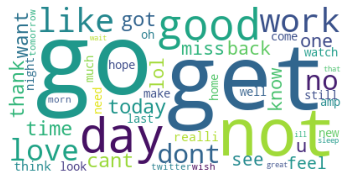

In [ ]:
#Wordcloud of 50 Most Frequent Words
mostFrequentWordsDict = {}
mostFrequentWords = sorted(total_count.items(), key=lambda x: x[1], reverse=True)[:50]
for key,freq in mostFrequentWords:
  mostFrequentWordsDict[dictionary[key]] = int(freq)
print(mostFrequentWordsDict)
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(mostFrequentWordsDict)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
#Least Frequently Used Words
leastFrequentWords = sorted(total_count.items(), key=lambda x: x[1])[:10]
for key,freq in leastFrequentWords:
  print(dictionary[key],freq)

muera 1
doucheclown 1
misslilli 1
manwa 1
samro 1
wwwdiigocomtautao 1
ugh92 1
coitu 1
nikster 1
shortsand 1


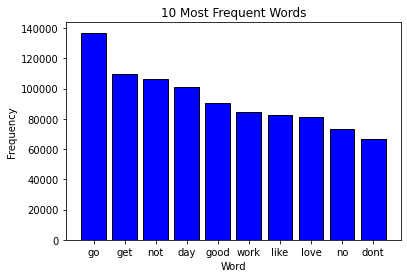

In [ ]:
#Histogram of Most Frequeny Words
mostFrequentWordsDictForHist = {}
mostFrequentWords = sorted(total_count.items(), key=lambda x: x[1], reverse=True)[:10]
for key,freq in mostFrequentWords:
  mostFrequentWordsDictForHist[dictionary[key]] = int(freq)

plt.bar(list(mostFrequentWordsDictForHist.keys()), mostFrequentWordsDictForHist.values(), color='blue',edgecolor='black',linewidth = 1)
plt.xlabel('Word')  
plt.ylabel('Frequency')  
# displaying the title 
plt.title("10 Most Frequent Words") 
plt.show()

In [ ]:
#Word2Vec
class MySentences(object):
    def __init__(self):
      print("Constructor")
    def __iter__(self):
        with open("twitter-corpus.csv") as f:
            for line in f:
                tweet = line.split(',')
                yield(tweet)
 
sentences = MySentences()
model = gensim.models.Word2Vec(sentences , iter = 10, size = 100)

Constructor


In [ ]:
#Save Cleaned Tweets
with open("twitter-corpus.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(tweets)

#Save Scores
with open("twitter-scores.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(scores)
  

In [ ]:
#Save Word2Vec Model
model.wv.save_word2vec_format('twitter-word2Vecmodel.bin', binary=True)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# **Train Validation Test Split** 

In [ ]:
#Load word2Vec Model
word2VecFromDrive = drive.CreateFile({'id':"1EgHkmSCftnyXc3oYt0lqrms0EcxPikdw"})
word2VecFromDrive.GetContentFile("twitter-word2Vecmodel.bin")
model = gensim.models.KeyedVectors.load_word2vec_format('twitter-word2Vecmodel.bin', binary = True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#Load cleaned Tweets
tweetsFromDrive = drive.CreateFile({'id':"1EE4DmlsZDGaJTb7eKHT8i9KxKGcu3QBm"})
tweetsFromDrive.GetContentFile("twitter-corpus.csv")
tweets = []
with open('twitter-corpus.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    tweets = list(csv_reader)
print(tweets[0])

#Load scores of Tweets
scores = []
scoresFromDrive = drive.CreateFile({'id':"12MoUaS97ngNlhfrydOqwc7AJI1LUOWxf"})
scoresFromDrive.GetContentFile("twitter-scores.csv")
with open('twitter-scores.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    scores = list(csv_reader)
    scores = scores[0]
print(scores[0])
for i in range(0,len(scores)):
  scores[i] = int(scores[i])

['awww', 'that', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']
0


In [ ]:
#Counting occurences of each class
print("Negative Tweets: ",scores.count(0))
print("Positive Tweets: ",scores.count(4))

Negative Tweets:  800000
Positive Tweets:  800000


In [ ]:
print(model["good"])

[ 1.5598195e+00  7.9729222e-02 -7.9734832e-01  6.1806705e-02
 -2.5485742e+00 -1.4533844e+00  2.3488922e-01 -1.4686337e+00
 -2.4524820e+00 -3.6058244e-01  2.9656968e-01 -7.4788266e-01
  1.6175625e+00 -8.9940828e-01 -4.8692048e-01  1.5925959e+00
  9.6304899e-01  1.2345026e+00  2.4657685e-01 -6.9697119e-02
  2.8506448e+00  2.0209634e-01 -4.8718572e-01 -1.5094883e+00
 -2.0571923e+00 -2.8787873e+00  1.2175996e+00  1.9864303e+00
  7.2044492e-01 -1.9070032e-01 -1.2088072e+00  1.2644647e+00
  3.9016816e-01 -2.0890312e+00  3.6113258e-02  1.3323451e+00
  1.3341950e+00  6.2577957e-01 -1.8562132e+00  7.5768763e-01
  1.1959599e+00  8.1647205e-01  2.0263464e+00 -2.9317993e-01
 -2.2693466e-01  6.7508548e-01 -9.7415167e-01  1.3243051e+00
  9.0893304e-01  5.9440428e-01  1.3103390e+00 -3.5646504e-01
  1.8374820e+00  2.3547432e+00  6.7169744e-01 -2.6871595e-01
  1.4028052e+00 -1.2163171e+00  9.7609740e-01 -1.2656643e+00
 -1.7509173e+00  5.3439927e-01  1.9176751e+00  1.8760504e+00
  1.6471310e+00  8.95629

In [ ]:
#Vocabulary of Word2Vec Model
vocabulary = list(model.wv.vocab)
print(len(vocabulary))

42468


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


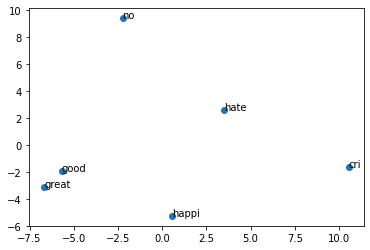

In [ ]:
#Plotting Word2Vec
testWords = ["good","great","hate","no","happi","cri"]
X = model[testWords]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(testWords):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
#Wor2Vec Vector of a Sentence
def getVector(sentence):
  count = 0
  result = np.zeros(100)
  sentence = sentence.split()
  if(len(sentence) <= 1):
    if(sentence[0] in vocabulary):
      result = model[sentence[0]]
    return result
  for word in sentence:
    if word in vocabulary:
      vector = model[word]
      result = result + vector
      count = count + 1
  if(count!=0):
    result = result/count
  return result

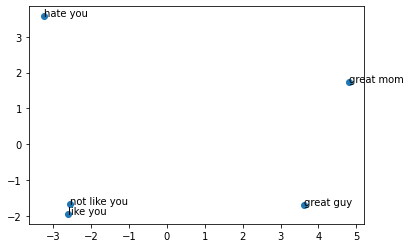

In [ ]:
#Plot Word2Vec Vectors of sentences 
testSentences = ["like you", "hate you","great guy","great mom"]
vectors = []
for s in testSentences:
  vectors.append(getVector(s))
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(testSentences):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show() 

In [ ]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(len(df))
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test



In [ ]:
ids = list(range(0,len(scores)))
tweetsDf = pd.DataFrame({"id": ids, "score": scores})


In [ ]:
tweetsDf.head()

,id,score
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
train,validate,test = train_validate_test_split(tweetsDf, train_percent = 0.9, validate_percent = 0.05, seed = 50)

In [ ]:
trainIDs = list(train['id'])
trainScores = list(train['score'])
trainTweets = []
for i in range(0,len(train)):
  trainTweets.append(tweets[int(trainIDs[i])])
  trainTweets[i].append(trainScores[i])
print(trainTweets[0])

['love', 'la', 'nice', 'home', 4]


In [ ]:
validateIDs = list(validate['id'])
validateScores = list(validate['score'])
validateTweets = []
for i in range(0,len(validate)):
  validateTweets.append(tweets[int(validateIDs[i])])
  validateTweets[i].append(validateScores[i])
print(validateTweets[130])

['absolut', 'ador', 'name', 4]


In [ ]:
testIDs = list(test['id'])
testScores = list(test['score'])
testTweets = []
for i in range(0,len(test)):
  testTweets.append(tweets[int(testIDs[i])])
  testTweets[i].append(testScores[i])
print(testTweets[0])
print(len(testTweets))

['twitter', 'doesnt', 'amus', 'one', 'bit', 0]
80000


In [ ]:
ids = list(range(0,len(scores)))
tweetsDf = pd.DataFrame({"id": ids, "score": scores, "tweets" : tweets})

In [ ]:
train['tweets'][0]

['awww', 'that', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

In [ ]:
#Save twitter-train.csv
with open("twitter-train.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(trainTweets)

In [ ]:
#Save twitter-validate.csv
with open("twitter-validate.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(validateTweets)

In [ ]:
#Save twitter-test.csv
with open("twitter-test.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(testTweets)

# **Model Building**

*   List item
*   List item



In [ ]:
#Load Training Dataset
trainTweetsFromDrive = drive.CreateFile({'id':"1zQM0NqrAF9TqnEMlzf1YJ6Aj6H9Vlupi"})
trainTweetsFromDrive.GetContentFile("twitter-train.csv")

#Load Validation Dataset
validateTweetsFromDrive = drive.CreateFile({'id':"14-CsrQdXr3nG17zVkf2nB6ZsReSVXlGv"})
validateTweetsFromDrive.GetContentFile("twitter-validate.csv")

testTweetsFromDrive = drive.CreateFile({'id':"1QtV_Fv1DQpqOFfRbOatyIej7y-sJkx9x"})
testTweetsFromDrive.GetContentFile("twitter-test.csv")



In [ ]:
#Load word2Vec Model
word2VecFromDrive = drive.CreateFile({'id':"1EgHkmSCftnyXc3oYt0lqrms0EcxPikdw"})
word2VecFromDrive.GetContentFile("twitter-word2Vecmodel.bin")
model = gensim.models.KeyedVectors.load_word2vec_format('twitter-word2Vecmodel.bin', binary = True)
#Vocabulary of Word2Vec Model
vocabulary = list(model.wv.vocab)
print(len(vocabulary))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


42468


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
 #Generator Function
def generate_arrays_from_file_embedding(path, batchsize):
    inputs = []
    labels = []
    batchcount = 0
    while True:
        with open(path) as f:
            for line in f:
                tweet = line.split(',')
                score = int(tweet[len(tweet) - 1])
                ids = []
                i = 0
                for i in range(0,len(tweet)):
                  if(tweet[i] in words):
                    ids.append(words.index(tweet[i]) + 1)
                  else:
                    ids.append(0)
                for i in range(len(tweet),50):
                  ids.append(0)
                inputs.append(ids)
                labels.append(int(score))
                batchcount += 1
                if batchcount >= batchsize:
                  X = np.array(inputs)
                  encoder = LabelEncoder()
                  encoder.fit(labels)
                  y = encoder.transform(labels)
                  y.reshape(-1,1)
                  yield (X, y)
                  inputs = []
                  labels = []
                  batchcount = 0

In [ ]:
#Creating Embedding layer
words = []
for i in range(0,len(vocabulary)):
  words.append(vocabulary[i])
print(len(words))
embedding_matrix = np.zeros((len(vocabulary)+1, 100))
embedding_matrix[0] = np.zeros(100)
i = 1
for word in words:
  embedding_matrix[i] = model.wv[word]
  i = i+1
print(embedding_matrix.shape)
embedding_layer = Embedding(len(vocabulary)+1, 100, weights=[embedding_matrix], input_length=50, trainable = False)


42468


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


(42469, 100)


In [ ]:
#Model Building
tweetModel = Sequential()
tweetModel.add(embedding_layer)
tweetModel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
tweetModel.add(Dense(32))
tweetModel.add(Dense(1, activation='sigmoid'))

In [ ]:
#Get Pre Trained Model (Epochs 1 - 3)
tweetModelFromDrive = drive.CreateFile({'id':"1n-yCtSH7APojjmenRPA9jdmnxMgugg4E"})
tweetModelFromDrive.GetContentFile("tweetModel.zip")
!unzip "tweetModel.zip"
tweetModel = keras.models.load_model('tweetModel')

Archive:  tweetModel.zip
   creating: tweetModel/assets/
  inflating: tweetModel/saved_model.pb  
   creating: tweetModel/variables/
  inflating: tweetModel/variables/variables.data-00000-of-00001  
  inflating: tweetModel/variables/variables.index  


In [ ]:
#Get Pre Trained Model (Epochs 4 - 6)
tweetModelFromDrive = drive.CreateFile({'id':"1Vd5m8je-OA8vexNWmAbvG3eSVAX2CqGt"})
tweetModelFromDrive.GetContentFile("tweetModel-II.zip")
!unzip "tweetModel-II.zip"
tweetModel = keras.models.load_model('tweetFolder-II')

Archive:  tweetModel-II.zip
   creating: tweetFolder-II/assets/
  inflating: tweetFolder-II/saved_model.pb  
   creating: tweetFolder-II/variables/
  inflating: tweetFolder-II/variables/variables.data-00000-of-00001  
  inflating: tweetFolder-II/variables/variables.index  


In [ ]:
#Compile Model
tweetModel.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(0.01),
              metrics=['accuracy'])

In [ ]:
#LR-Decay and Early Stopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

# **Model Training**

In [ ]:
#Train Model
history = tweetModel.fit(generate_arrays_from_file_embedding("twitter-train.csv",2048),
                   steps_per_epoch = int(1440000 // 2048),
                   epochs = 3,
                   verbose = 1,
                   validation_data = generate_arrays_from_file_embedding("twitter-validate.csv",2048),
                   validation_steps = int(80000 // 2048))

In [ ]:
#Evaluate Model on Test Split
testAcc = [0.8060, 0.8100]
testLoss = [ 0.4261, 0.4245]
testHistory = tweetModel.evaluate(generate_arrays_from_file_embedding("twitter-test.csv",2048), steps = int(80000 // 2048), 
                   batch_size = 2048)

39/39 [==============================] - 98s 3s/step - loss: 0.4459 - accuracy: 0.8076


In [ ]:
train_loss = [0.47171711921691895, 0.43796518445014954, 0.43237683176994324, 0.42316490411758423, 0.3978163003921509, 0.3839259445667267]
train_accuracy = [0.7726040482521057, 0.7958921790122986, 0.7987655997276306, 0.8049854636192322, 0.8192185759544373, 0.8268192410469055]
val_accuracy = [0.8014698624610901, 0.8061898946762085, 0.8076171875, 0.8099208474159241, 0.8117738366127014, 0.8114233016967773]
val_loss = [0.42957398295402527, 0.4226222038269043, 0.4208592176437378, 0.4117220938205719, 0.41428062319755554, 0.41979989409446716]


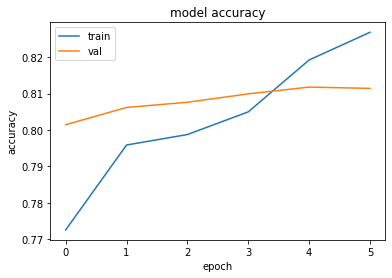

In [ ]:
#Plot Accuracy
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

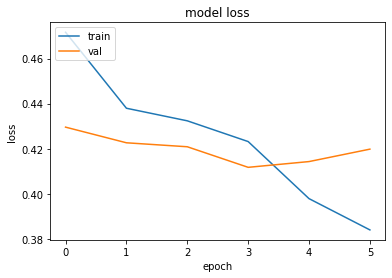

In [ ]:
#Plot Loss
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



```
# This is formatted as code
```

# **Prediction**

In [ ]:
#Function to predict the Sentiment of given Tweet
def predictTweet(tweet):
  tweet = re.sub('@[^\s]+','',tweet)
  tweet = re.sub('http[^\s]+','',tweet)
  tweet = tweet.translate(str.maketrans('', '', string.punctuation))
  tweet = tweet.lower()
  tweet = re.sub(" \d+", "", tweet)
  tweet = tweet.split()
  stop_words = set(stopwords.words('english')) 
  stop_words.add("im")
  stop_words.remove("no")
  stop_words.remove("against")
  stop_words.remove("not")
  stop_words.remove("don")
  filtered_tweet = []
  for word in tweet:
    if(word not in stop_words):
      filtered_tweet.append(word)
  tweet = filtered_tweet
  filtered_tweet = []
  ps = PorterStemmer() 
  for word in tweet:
    filtered_tweet.append(ps.stem(word))
  tweet = filtered_tweet
  ids = []
  i = 0
  for i in range(0,len(tweet)):
    if(tweet[i] in words):
      ids.append(words.index(tweet[i]) + 1)
    else:
      ids.append(0)
  for i in range(len(tweet),50):
      ids.append(0)
  test = []
  test.append(ids)
  x = np.array(test)
  result = tweetModel.predict(x)
  if (result[0][0] < 0.5):
    return (result[0][0], "Negative")
  else:
    return (result[0][0], "Positive")
  

In [ ]:
print(predictTweet("Endgame was the best movie I have seen in years!!!"))

(0.9427279, 'Positive')


In [ ]:
print(predictTweet("i dont like it"))

(0.07991418, 'Negative')


In [ ]:
print(predictTweet("its really not bad"))

(0.8137139, 'Positive')


In [ ]:
print(predictTweet("its really not good"))

(0.011000335, 'Negative')


In [ ]:
print(predictTweet("very bad ambience..but very good service..i really loved the food"))

(0.662084, 'Positive')


In [ ]:
print(predictTweet("it was amazing for the first few days..but it was really bad during last few days."))

(0.030757934, 'Negative')


In [ ]:
print(predictTweet("initially i thought it would be bad..but i found it to be the best"))

(0.8982426, 'Positive')


In [ ]:
print(predictTweet("initially i thought it was the best..but i found it to be bad"))

(0.12912095, 'Negative')


In [ ]:
print(predictTweet("initially i thought it would be a great dish ..but i found it to be the worst dish I have ever eaten"))

(0.12941921, 'Negative')


# **Saving Model**

In [ ]:
tweetModel.save('tweetModel-II')

INFO:tensorflow:Assets written to: tweetModel-II/assets
